In [1]:
import pandas as pd
import plotly
import plotly.io as pio
import plotly.offline as pyo
pyo.init_notebook_mode()
from math import sqrt
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
from matplotlib_dashboard import MatplotlibDashboard
import duckdb
import plotly.graph_objects as go
warnings.filterwarnings("ignore")
import math

# Checking Data

In [2]:
checkout_1 = pd.read_csv('checkout_1.csv')
checkout_1['time'] = pd.to_datetime(checkout_1['time'], format='%Hh').dt.strftime('%H:%M')
checkout_1

time  today  yesterday  same_day_last_week  avg_last_week  avg_last_month
0   00:00      9         12                  11           6.42            4.85
1   01:00      3          5                   1           1.85            1.92
2   02:00      1          0                   0           0.28            0.82
3   03:00      1          0                   0           0.42            0.46
4   04:00      0          0                   1           0.42            0.21
5   05:00      1          1                   2           1.28            0.75
6   06:00      1          1                   5           2.85            2.28
7   07:00      2          3                   9           5.57            5.21
8   08:00      0          1                  18           8.71           10.42
9   09:00      2          9                  30          20.00           19.07
10  10:00     55         51                  45          29.42           28.35
11  11:00     36         44                  38          33.71           28.50
12  12:00     51         39                  39          27.57           25.42
13  13:00     36         41                  43          25.85           24.21
14  14:00     32         35                  36          26.14           25.21
15  15:00     51         35                  49          28.14           27.71
16  16:00     41         36                  48          27.71           25.64
17  17:00     45         30                  29          20.42           22.28
18  18:00     32         25                  25          21.57           18.28
19  19:00     33         39                  42          22.14           18.67
20  20:00     25         24                  34          17.42           18.92
21  21:00     30         35                  34          18.71           17.57
22  22:00     28         29                  23          15.42           15.64
23  23:00     11         28                  10           9.57            8.75

In [3]:
checkout_2 = pd.read_csv('checkout_2.csv')
checkout_2['time'] = pd.to_datetime(checkout_2['time'], format='%Hh').dt.strftime('%H:%M')
checkout_2

time  today  yesterday  same_day_last_week  avg_last_week  avg_last_month
0   00:00      6          9                   5          5.000            4.92
1   01:00      3          3                   2          2.000            1.92
2   02:00      3          1                   2          0.420            0.75
3   03:00      0          1                   1          0.420            0.46
4   04:00      0          0                   0          0.140            0.21
5   05:00      2          1                   1          0.710            0.71
6   06:00      3          1                   2          1.420            2.10
7   07:00     10          2                   9          3.000            5.03
8   08:00     25          0                  12          3.710            9.82
9   09:00     36          2                  27         10.140           17.64
10  10:00     43         55                  42         26.140           28.57
11  11:00     44         36                  47         25.000           28.28
12  12:00     46         51                  46         24.000           25.89
13  13:00     45         36                  31         20.280           24.17
14  14:00     19         32                  35         19.570           24.89
15  15:00      0         51                  42         22.427           27.78
16  16:00      0         41                  36         21.570           25.53
17  17:00      0         45                  19         17.710           22.67
18  18:00     13         32                  29         16.850           18.46
19  19:00     32         33                  29         18.000           18.21
20  20:00     23         25                  17         12.140           18.53
21  21:00     28         30                  23         14.850           17.82
22  22:00     29         28                  17         12.710           15.50
23  23:00     17         11                  14          8.280            8.75

We can see the entire dataset, and in both cases we have no missing values or out of place values. We will skip looking for errors in data

# Analysing Data Similarity

We need to compare both files and check if they are from the same context/distribution. We can do this in 3 steps:

- Analyse Similarity in Distributions (**[Kolmogorov-Smirnov test](https://towardsdatascience.com/comparing-sample-distributions-with-the-kolmogorov-smirnov-ks-test-a2292ad6fee5)**)
- Covariance
- Correlation


But the data points we have are too few for this analysis, specially because the different hours have different behaviors. We will use our few data points to add in a Standard Deviation, since we have the mean to compare. With the standard deviation and the mean, we can simulate a distribution with more data points, and compare both files.

We will be using the monthly average because it has a larger population and is closer to reality. Standard deviation is calculated using different days presented in the data (today, yesterday, same day last week). 
It is not ideal to use the monthly average to measure the standard deviation of 3 days of data, but it is what we have.

In [4]:

checkout_1['std_hour'] = ((checkout_1['today'] -  checkout_1['avg_last_month'])**2 +
                        (checkout_1['yesterday'] -  checkout_1['avg_last_month'])**2 +
                        (checkout_1['same_day_last_week'] -  checkout_1['avg_last_month'])**2) / (3-1)#n-1 (sample)

checkout_1['std_hour'] = np.sqrt(checkout_1['std_hour'])

In [5]:
checkout_2['std_hour'] = ((checkout_2['today'] -  checkout_2['avg_last_month'])**2 +
                        (checkout_2['yesterday'] -  checkout_2['avg_last_month'])**2 +
                        (checkout_2['same_day_last_week'] -  checkout_2['avg_last_month'])**2) / (3-1)#n-1 (sample)

checkout_2['std_hour'] = np.sqrt(checkout_2['std_hour'])

### Simulated Distributions of Sales from each file p/hour

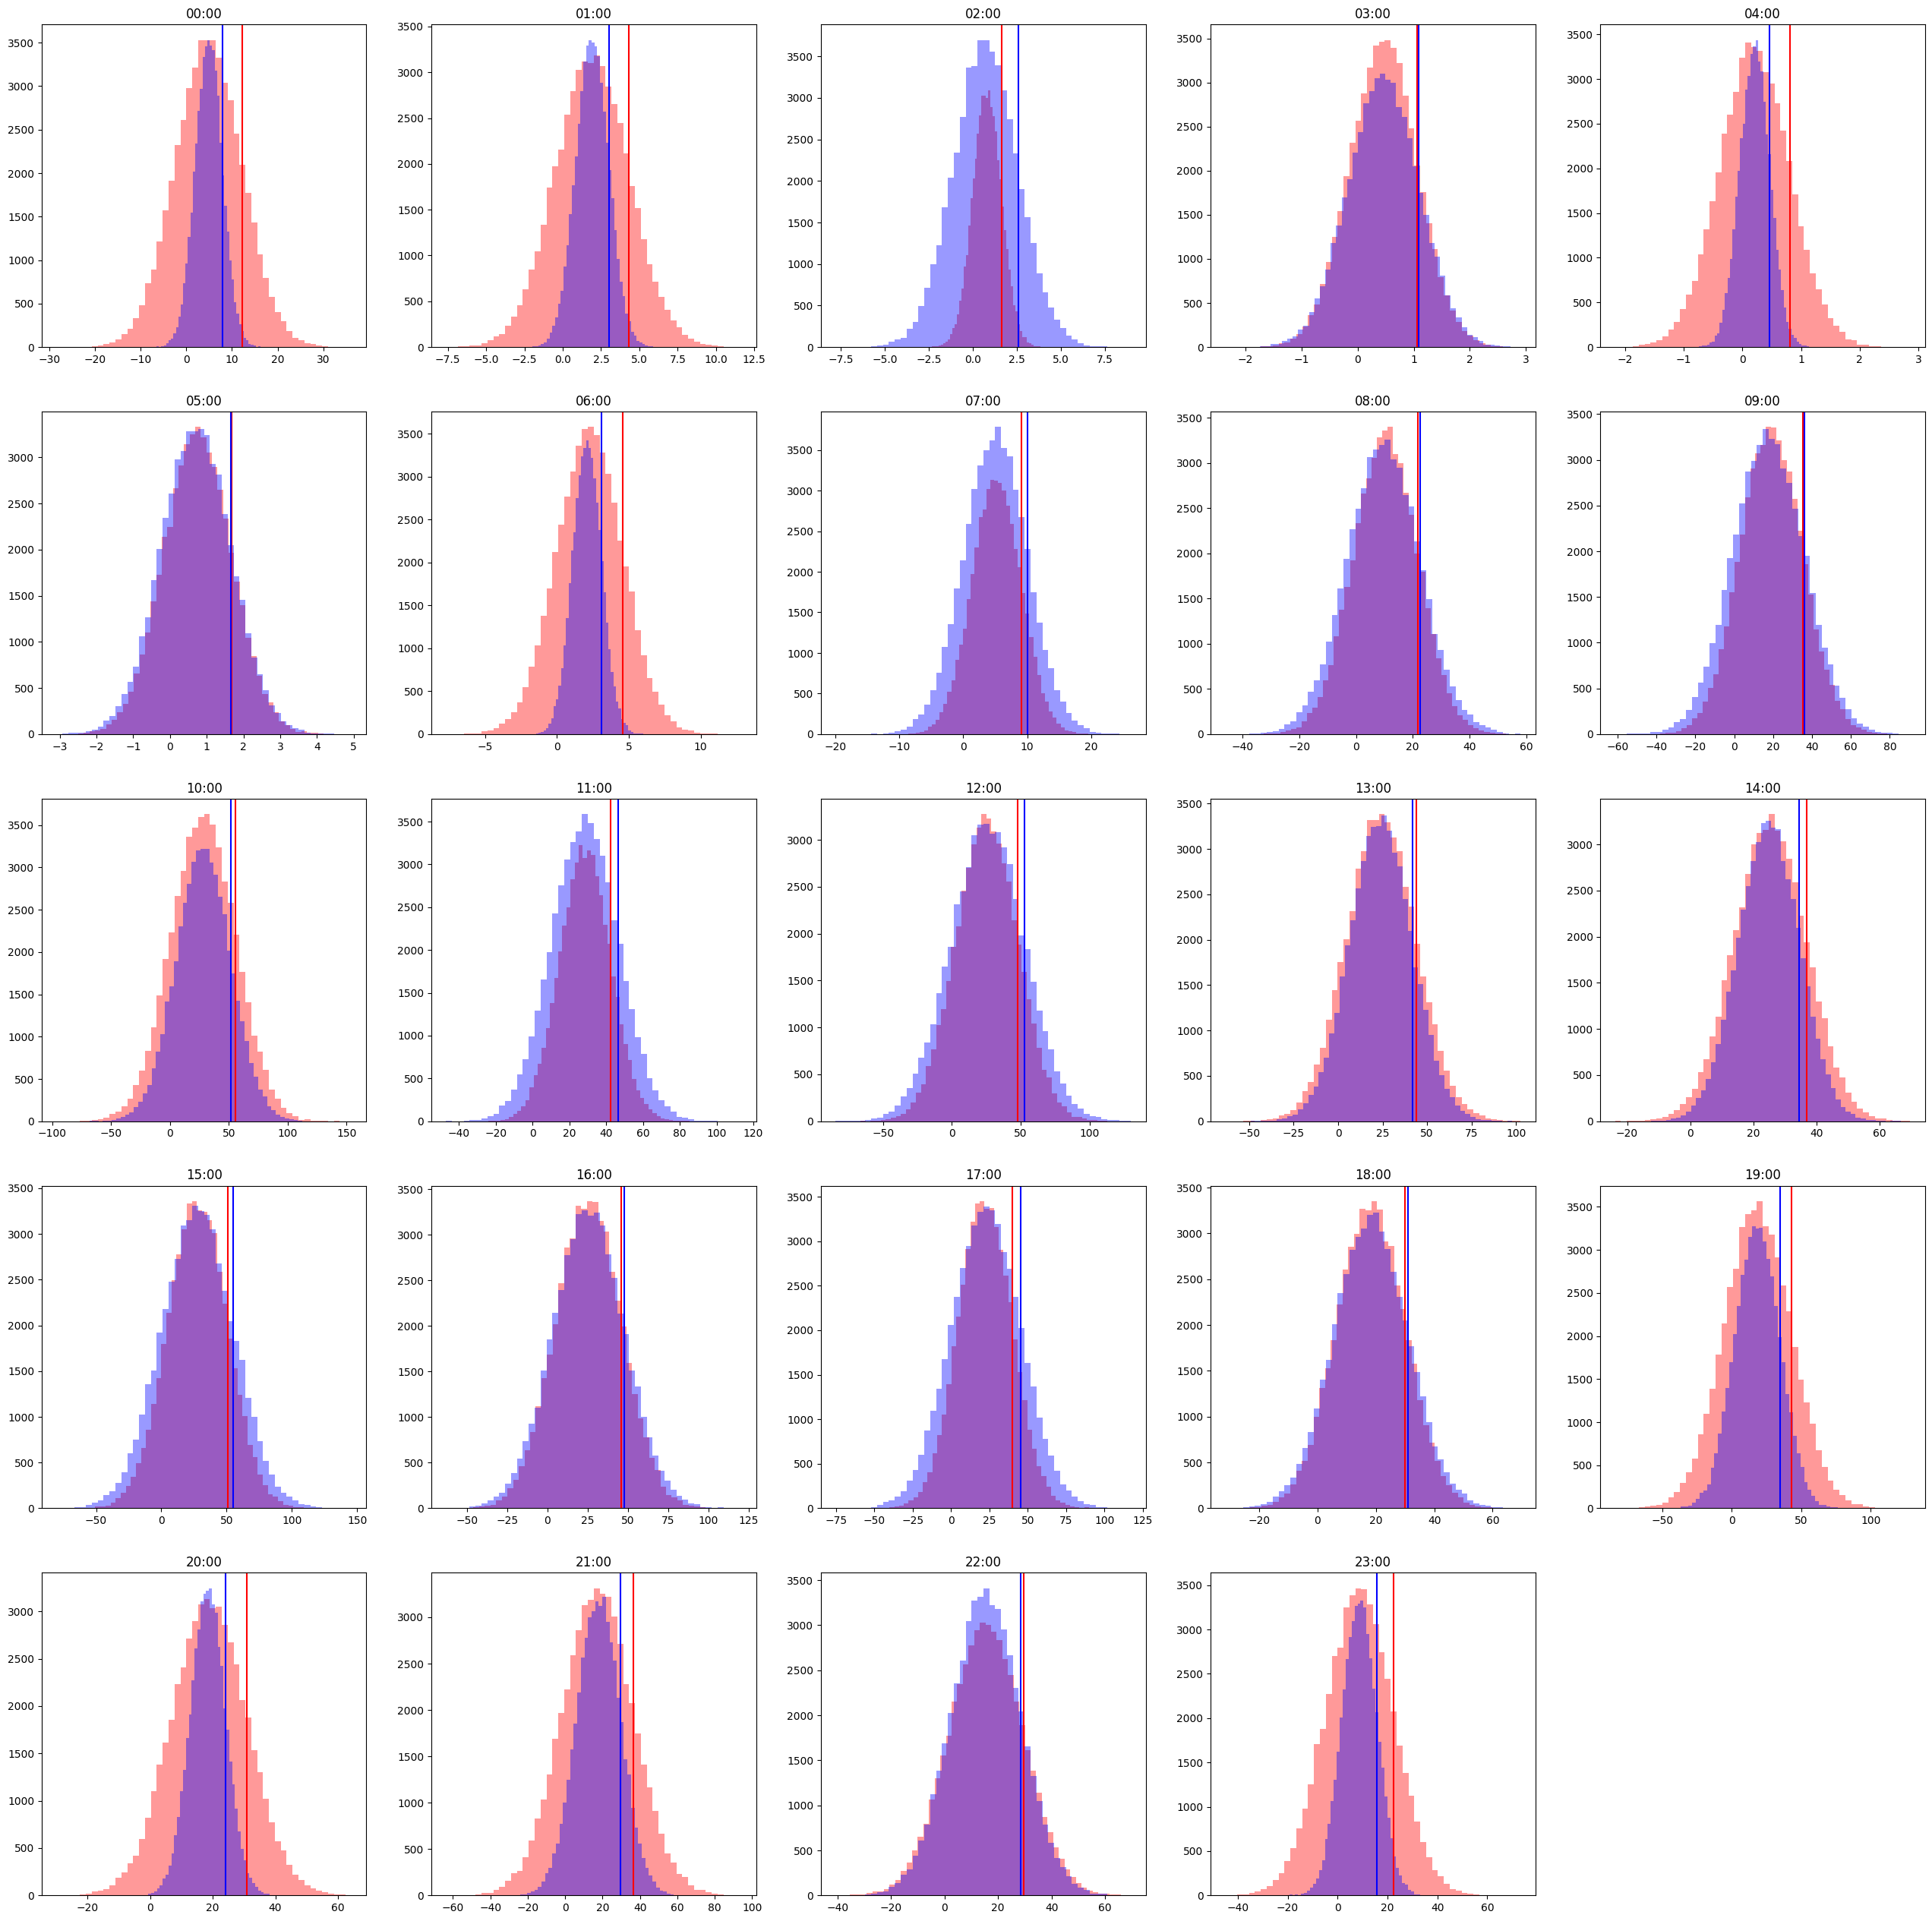

In [6]:



fig = plt.figure(figsize=(32,32))
fig.subplots_adjust(hspace=0.2, wspace=0.2)
for i in checkout_1.index: 
    avg = checkout_1.loc[i, 'avg_last_month']
    std = checkout_1.loc[i, 'std_hour']
    group_1 = np.random.normal(loc=avg, scale=std, size=50000)
    avg = checkout_2.loc[i, 'avg_last_month']
    std = checkout_2.loc[i, 'std_hour']
    group_2 = np.random.normal(loc=avg, scale=std, size=50000)

    ax = fig.add_subplot(5, 5, i+1)
    
    sns.distplot(group_1, kde=False, ax=ax, color='red')
    ax.axvline(np.mean(group_1) + np.std(group_1), color='red')
    sns.distplot(group_2, kde=False, ax=ax, color='blue')
    ax.axvline(np.mean(group_2) + np.std(group_2), color='blue')
    
    ax.set_title(str(checkout_1.loc[i, 'time']))


plt.show()


## Kolmogorov-Smirnov

The Kolmogorov-Smirnov 2 sample test evaluates the likelihood of 2 samples being sampled from the same distribution, giving a *p value* to accept or reject the hypothesis. P values above 0.05 (5% significance) are considered accepting of the null hypothesis i.e. the 2 samples are sampled from very similar distributions.


In [24]:
from scipy.stats import ks_2samp

for i in checkout_1.index: 
    avg = checkout_1.loc[i, 'avg_last_month']
    std = checkout_1.loc[i, 'std_hour']
    group_1 = np.random.normal(loc=avg, scale=std, size=1000)
    avg = checkout_2.loc[i, 'avg_last_month']
    std = checkout_2.loc[i, 'std_hour']
    group_2 = np.random.normal(loc=avg, scale=std, size=1000)#smaller sample as KS test gives false negatives on larger samples
    result = ks_2samp(group_1, group_2)

    print(checkout_2.loc[i, 'time'], '\t', result[1], '\t\tNull Hypothesis: ', result[1]>0.05 )   

00:00 	 1.2672018670773729e-27 		Null Hypothesis:  False
01:00 	 6.6131216618004355e-18 		Null Hypothesis:  False
02:00 	 6.954764781424622e-15 		Null Hypothesis:  False
03:00 	 0.9357699014782725 		Null Hypothesis:  True
04:00 	 1.1979681866777803e-20 		Null Hypothesis:  False
05:00 	 0.37012017606173 		Null Hypothesis:  True
06:00 	 5.032549473768586e-16 		Null Hypothesis:  False
07:00 	 0.002393409648884169 		Null Hypothesis:  False
08:00 	 0.37012017606173 		Null Hypothesis:  True
09:00 	 0.3136800387320582 		Null Hypothesis:  True
10:00 	 0.07761108123267829 		Null Hypothesis:  True
11:00 	 0.0038826726503625613 		Null Hypothesis:  False
12:00 	 0.012912352230759101 		Null Hypothesis:  False
13:00 	 0.43260886958153144 		Null Hypothesis:  True
14:00 	 0.14836452078962484 		Null Hypothesis:  True
15:00 	 0.06917625399020766 		Null Hypothesis:  True
16:00 	 0.13385273551786803 		Null Hypothesis:  True
17:00 	 0.017090148468768534 		Null Hypothesis:  False
18:00 	 0.26347172719864703

In a lot of cases The p-value is greater than 0.05, which means it is likely that both samples were taken from the same ditribution. Which means the distributions are similar.

## Covariance

Text(0.5, 1.0, 'Covariance')

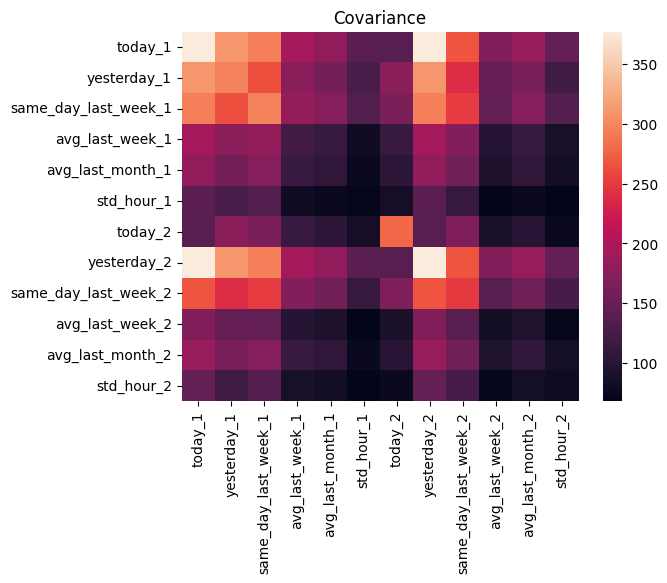

In [7]:
joined_df = pd.merge(checkout_1, checkout_2, on='time', suffixes=['_1','_2'])

ax = sns.heatmap(joined_df.drop('time', axis=1).cov())
plt.title('Covariance')


## Correlation

Text(0.5, 1.0, 'Correlation')

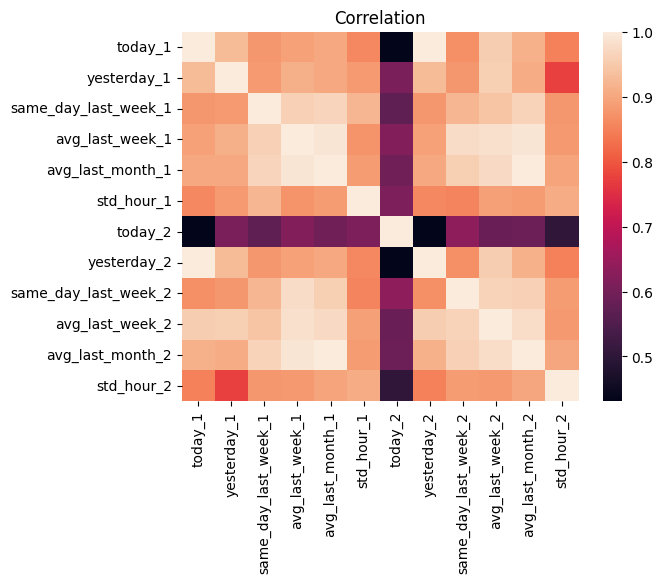

In [8]:


sns.heatmap(joined_df.drop('time', axis=1).corr())
plt.title('Correlation')

**Notes**:

- The column *today2* has a high lack of covariance and correlation, especially when compared to the other columns, this indicates an anomolous behavior
  
- *yesterday_2* and *today_1* have a high correlation, that can mean they are the same and the files are from consecutive days

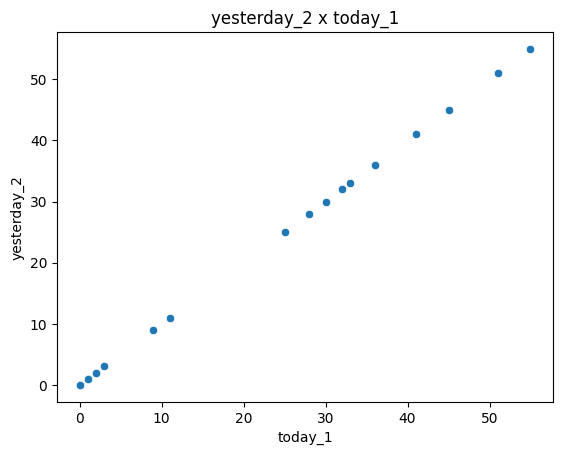

In [9]:
ax = sns.scatterplot(x=joined_df.today_1, y=joined_df.yesterday_2)
plt.title('yesterday_2 x today_1')
plt.show()

It is a perfect 1 to 1. We will concatenate the dataframes in sequence for further analysis

In [10]:
main_df = pd.concat([checkout_1, checkout_2])
main_df

time  today  yesterday  same_day_last_week  avg_last_week  \
0   00:00      9         12                  11          6.420   
1   01:00      3          5                   1          1.850   
2   02:00      1          0                   0          0.280   
3   03:00      1          0                   0          0.420   
4   04:00      0          0                   1          0.420   
5   05:00      1          1                   2          1.280   
6   06:00      1          1                   5          2.850   
7   07:00      2          3                   9          5.570   
8   08:00      0          1                  18          8.710   
9   09:00      2          9                  30         20.000   
10  10:00     55         51                  45         29.420   
11  11:00     36         44                  38         33.710   
12  12:00     51         39                  39         27.570   
13  13:00     36         41                  43         25.850   
14  14:00     32         35                  36         26.140   
15  15:00     51         35                  49         28.140   
16  16:00     41         36                  48         27.710   
17  17:00     45         30                  29         20.420   
18  18:00     32         25                  25         21.570   
19  19:00     33         39                  42         22.140   
20  20:00     25         24                  34         17.420   
21  21:00     30         35                  34         18.710   
22  22:00     28         29                  23         15.420   
23  23:00     11         28                  10          9.570   
0   00:00      6          9                   5          5.000   
1   01:00      3          3                   2          2.000   
2   02:00      3          1                   2          0.420   
3   03:00      0          1                   1          0.420   
4   04:00      0          0                   0          0.140   
5   05:00      2          1                   1          0.710   
6   06:00      3          1                   2          1.420   
7   07:00     10          2                   9          3.000   
8   08:00     25          0                  12          3.710   
9   09:00     36          2                  27         10.140   
10  10:00     43         55                  42         26.140   
11  11:00     44         36                  47         25.000   
12  12:00     46         51                  46         24.000   
13  13:00     45         36                  31         20.280   
14  14:00     19         32                  35         19.570   
15  15:00      0         51                  42         22.427   
16  16:00      0         41                  36         21.570   
17  17:00      0         45                  19         17.710   
18  18:00     13         32                  29         16.850   
19  19:00     32         33                  29         18.000   
20  20:00     23         25                  17         12.140   
21  21:00     28         30                  23         14.850   
22  22:00     29         28                  17         12.710   
23  23:00     17         11                  14          8.280   

    avg_last_month   std_hour  
0             4.85   7.285860  
1             1.92   2.397832  
2             0.82   0.829819  
3             0.46   0.597829  
4             0.21   0.596783  
5             0.75   0.918559  
6             2.28   2.310325  
7             5.21   3.843976  
8            10.42  11.286479  
9            19.07  16.003979  
10           28.35  27.390395  
11           28.50  13.905934  
12           25.42  22.618236  
13           24.21  19.671964  
14           25.21  11.366009  
15           27.71  22.900134  
16           25.64  20.533251  
17           22.28  17.620375  
18           18.28  11.801593  
19           18.67  24.113759  
20           18.92  12.045314  
21           17.57  19.082121  
22           15.64  13.882161  
23

**Conclusion**:  The checkout files are very similar in distribution, measures and numbers. It seems we can safely assume they are the same POS, in consecutive days. And we will assume such for the rest of the analysis

Now we will use both files and try to detect anomalies

# Data Augmentation

  - **last_week_total_est**: Estimate of total sales from that hour in the week, using *avg_last_week x 7*
 - **last_month_total_est**: Estimate of total sales from that hour in the last month, using *avg_last_month x 30*. Uses only avg from file 1 since both are very similar
 - **std_hour**: Standard deviation of sales from that hour, uses all data entries from singular days (today, yesterday, same_day_last_week) as data points for the calculation.

In [11]:
analysis_df = duckdb.query("""
SELECT time, today, yesterday, same_day_last_week,avg_last_week, avg_last_month,
    avg_last_week * 7 as last_week_total_est,
    avg_last_month * 30 as last_month_total_est,
    
     sqrt( 
        (today - avg_last_month)**2 +      
        (yesterday - avg_last_month)**2 +
        (same_day_last_week - avg_last_month)**2
         / (3-1)
        ) as std_hour
FROM main_df 
             """).df()
analysis_df

time  today  yesterday  same_day_last_week  avg_last_week  \
0   00:00      9         12                  11          6.420   
1   01:00      3          5                   1          1.850   
2   02:00      1          0                   0          0.280   
3   03:00      1          0                   0          0.420   
4   04:00      0          0                   1          0.420   
5   05:00      1          1                   2          1.280   
6   06:00      1          1                   5          2.850   
7   07:00      2          3                   9          5.570   
8   08:00      0          1                  18          8.710   
9   09:00      2          9                  30         20.000   
10  10:00     55         51                  45         29.420   
11  11:00     36         44                  38         33.710   
12  12:00     51         39                  39         27.570   
13  13:00     36         41                  43         25.850   
14  14:00     32         35                  36         26.140   
15  15:00     51         35                  49         28.140   
16  16:00     41         36                  48         27.710   
17  17:00     45         30                  29         20.420   
18  18:00     32         25                  25         21.570   
19  19:00     33         39                  42         22.140   
20  20:00     25         24                  34         17.420   
21  21:00     30         35                  34         18.710   
22  22:00     28         29                  23         15.420   
23  23:00     11         28                  10          9.570   
24  00:00      6          9                   5          5.000   
25  01:00      3          3                   2          2.000   
26  02:00      3          1                   2          0.420   
27  03:00      0          1                   1          0.420   
28  04:00      0          0                   0          0.140   
29  05:00      2          1                   1          0.710   
30  06:00      3          1                   2          1.420   
31  07:00     10          2                   9          3.000   
32  08:00     25          0                  12          3.710   
33  09:00     36          2                  27         10.140   
34  10:00     43         55                  42         26.140   
35  11:00     44         36                  47         25.000   
36  12:00     46         51                  46         24.000   
37  13:00     45         36                  31         20.280   
38  14:00     19         32                  35         19.570   
39  15:00      0         51                  42         22.427   
40  16:00      0         41                  36         21.570   
41  17:00      0         45                  19         17.710   
42  18:00     13         32                  29         16.850   
43  19:00     32         33                  29         18.000   
44  20:00     23         25                  17         12.140   
45  21:00     28         30                  23         14.850   
46  22:00     29         28                  17         12.710   
47  23:00     17         11                  14          8.280   

    avg_last_month  last_week_total_est  last_month_total_est   std_hour  
0             4.85               44.940                 145.5   9.341105  
1             1.92               12.950                  57.6   3.328062  
2             0.82                1.960                  24.6   1.020294  
3             0.46                2.940                  13.8   0.780385  
4             0.21                2.940                   6.3   0.632653  
5             0.75                8.960                  22.5   0.951972  
6             2.28               19.950                  68.4   2.641212  
7             5.21               38.990                 156.3   4.729720  
8            10.42               60.970                 312.6  15.034660  
9            19.07  

# Analysis

It seems there is a trend of sales following the different times of day. Let's take the average of all the sales data related to single days (today, yesterday, same_day_last_week) and show it in a graph to better see this trend.

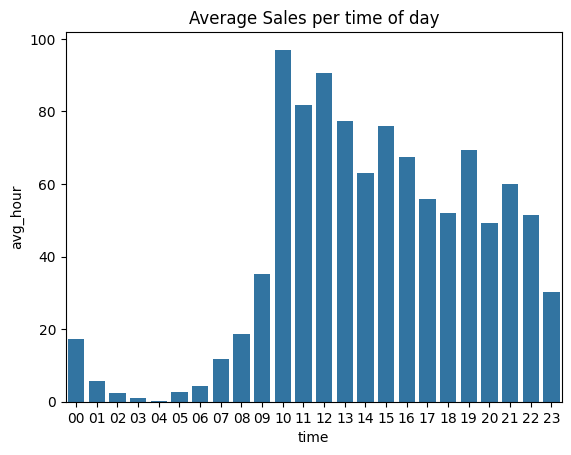

In [12]:
bar = duckdb.query("""
SELECT REPLACE(CAST(time as STRING),':00','') as time, SUM( (today + yesterday + same_day_last_week)/3 ) as avg_hour
FROM analysis_df
GROUP BY time
""").df().sort_values('time')
sns.barplot(bar, x='time', y='avg_hour')
plt.title('Average Sales per time of day')
plt.show()

Let's see the trend for each individual day

In [13]:
lines = duckdb.query("""
SELECT REPLACE(CAST(chk1.time as STRING),':00','') as time, chk1.today, chk1.yesterday, chk1.same_day_last_week, chk2.today as today_2
FROM checkout_1 as chk1
LEFT JOIN checkout_2 as chk2 ON chk1.time = chk2.time
""").df()



fig = go.Figure()
fig.add_trace(go.Scatter(x=lines.time, y=lines.today,
                    mode='lines',
                    name='today'))

fig.add_trace(go.Scatter(x=lines.time, y=lines.today_2,
                    mode='lines',
                    name='today_2'))

fig.add_trace(go.Scatter(x=lines.time, y=lines.yesterday,
                    mode='lines',
                    name='yesterday'))

fig.add_trace(go.Scatter(x=lines.time, y=lines.same_day_last_week,
                    mode='lines',
                    name='same_day_last_week'))


fig.show()



Clearly, the various days follow the same trend in sales through the hours. Except for **today_2** which is from the second file

As we have seen before, *today_2*

And here we have it. *today_2* is the only variable that doesn't have a correlation very close to 1.

Just to reinforce the idea that this is an anomaly, we will compare all days to different averages side by side.

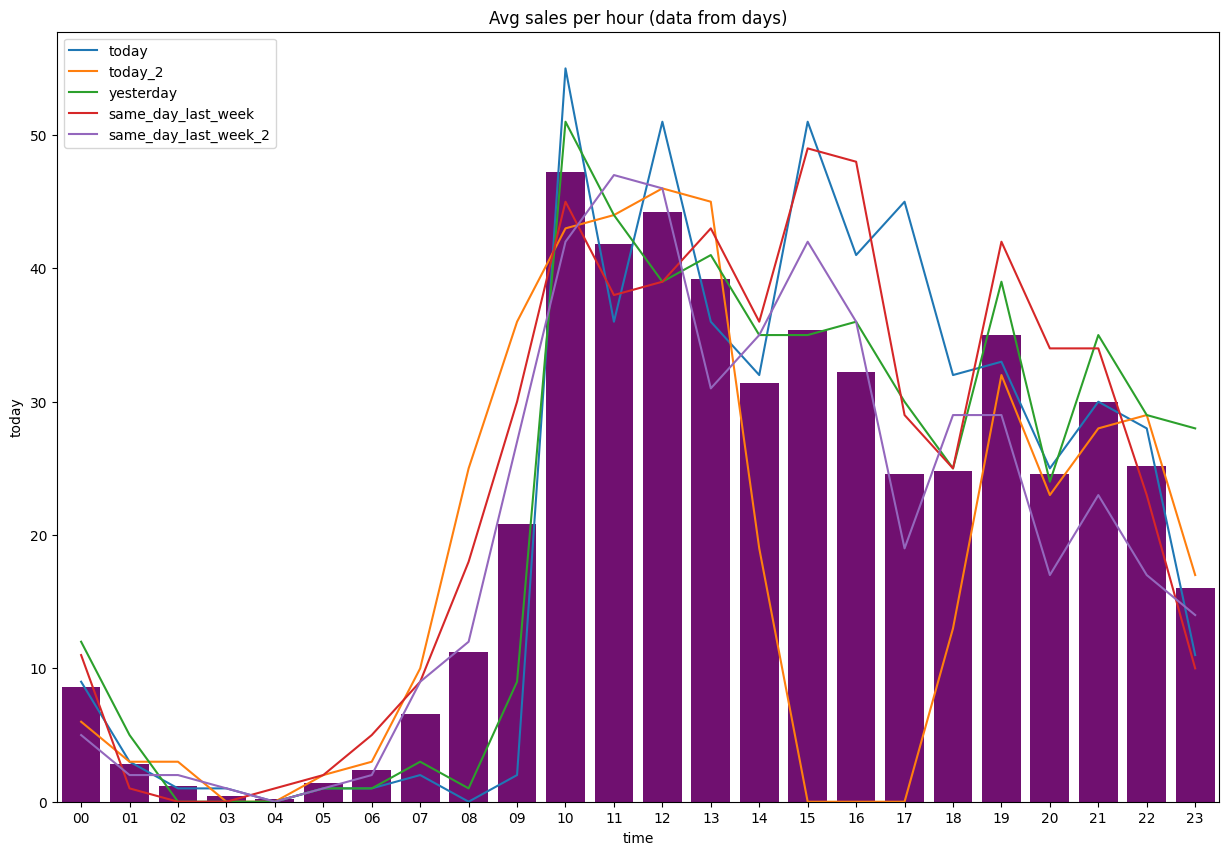

In [14]:
lines = duckdb.query("""
SELECT REPLACE(CAST(chk1.time as STRING),':00','') as time, chk1.today, chk1.yesterday, chk1.same_day_last_week, chk2.today as today_2,
    chk2.same_day_last_week as same_day_last_week_2, chk1.avg_last_month as avg_last_month,
    (chk1.today + chk1.yesterday + chk1.same_day_last_week + chk2.today + chk2.same_day_last_week)/5 as avg_hour
FROM checkout_1 as chk1
LEFT JOIN checkout_2 as chk2 ON chk1.time = chk2.time
""").df()

plt.figure(figsize=(15,10))
sns.lineplot(lines, x='time', y='today', label='today')
sns.lineplot(lines, x='time', y='today_2', label='today_2')
sns.lineplot(lines, x='time', y='yesterday', label='yesterday')
sns.lineplot(lines, x='time', y='same_day_last_week', label='same_day_last_week')
sns.lineplot(lines, x='time', y='same_day_last_week_2', label='same_day_last_week_2')
sns.barplot(lines, x='time', y='avg_hour', color='purple')
plt.title('Avg sales per hour (data from days)')
plt.legend(loc="upper left")

If you look closely to the graph, there is a trend from hour 14 to 15 where sales increase and then decrease. A better way to check and expose this better is to check the percentage change from row to row and compare the different variables.

Notes:
- *pandas.Dataframe.pct_change* creates NaNs and Infinites when zeros are involved.
    - For the first 0 after a number, pct_change will be -100%, we will forward this for Nans
    - The first number after a 0 will be Infinite, we will replace this with +100%

In [15]:
pct_changes = lines.drop('time',axis=1).pct_change().fillna(method='ffill').replace([np.inf], 1.00)
pct_changes['time'] = lines['time']

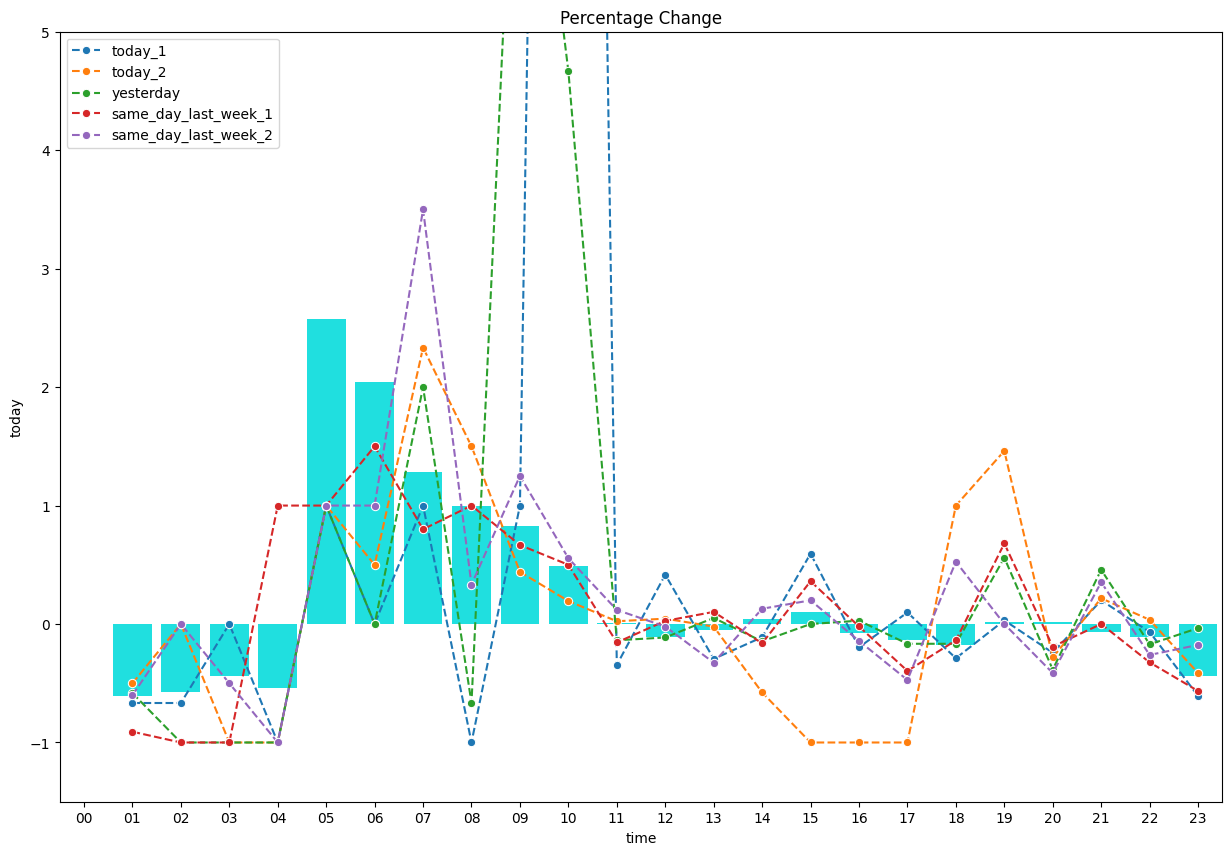

In [16]:
pct_change_analysis =pct_changes


plt.figure(figsize=(15,10))
sns.lineplot(pct_change_analysis, x='time', y='today', label='today_1', marker='o',linestyle="dashed")
sns.lineplot(pct_change_analysis, x='time', y='today_2', label='today_2', marker='o',linestyle="dashed")
sns.lineplot(pct_change_analysis, x='time', y='yesterday', label='yesterday', marker='o',linestyle="dashed")
sns.lineplot(pct_change_analysis, x='time', y='same_day_last_week', label='same_day_last_week_1', marker='o',linestyle="dashed")
sns.lineplot(pct_change_analysis, x='time', y='same_day_last_week_2', label='same_day_last_week_2', marker='o',linestyle="dashed")

ax = sns.barplot(pct_change_analysis, x='time', y='avg_last_month', color='cyan')
ax.set_ylim(-1.5,5)

plt.title('Percentage Change')
plt.legend(loc="upper left")

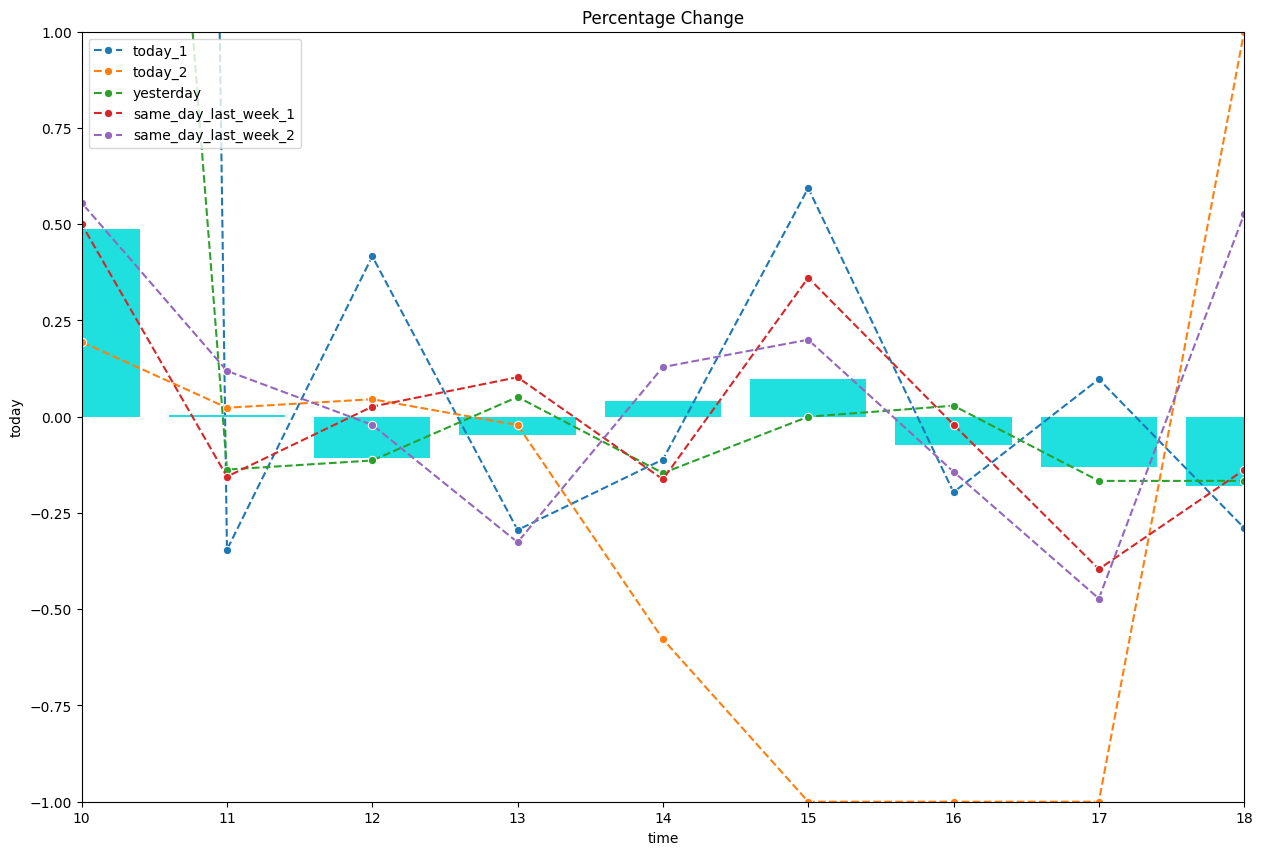

In [17]:



plt.figure(figsize=(15,10))
sns.lineplot(pct_change_analysis, x='time', y='today', label='today_1', marker='o',linestyle="dashed")
sns.lineplot(pct_change_analysis, x='time', y='today_2', label='today_2', marker='o',linestyle="dashed")
sns.lineplot(pct_change_analysis, x='time', y='yesterday', label='yesterday', marker='o',linestyle="dashed")
sns.lineplot(pct_change_analysis, x='time', y='same_day_last_week', label='same_day_last_week_1', marker='o',linestyle="dashed")
sns.lineplot(pct_change_analysis, x='time', y='same_day_last_week_2', label='same_day_last_week_2', marker='o',linestyle="dashed")

ax = sns.barplot(pct_change_analysis, x='time', y='avg_last_month', color='cyan')
ax.set_ylim(-1,1)
ax.set_xlim(10,18)
plt.title('Percentage Change')
plt.legend(loc="upper left")

As we can see here, all other variables we have on sales has a growth from hour 14 to 15, *except* today_2, which goes down to 0 sales and stays there for some hours. Thus proving further it is an anomaly, probably the POS went down for some time.

# Anomalies without context and data

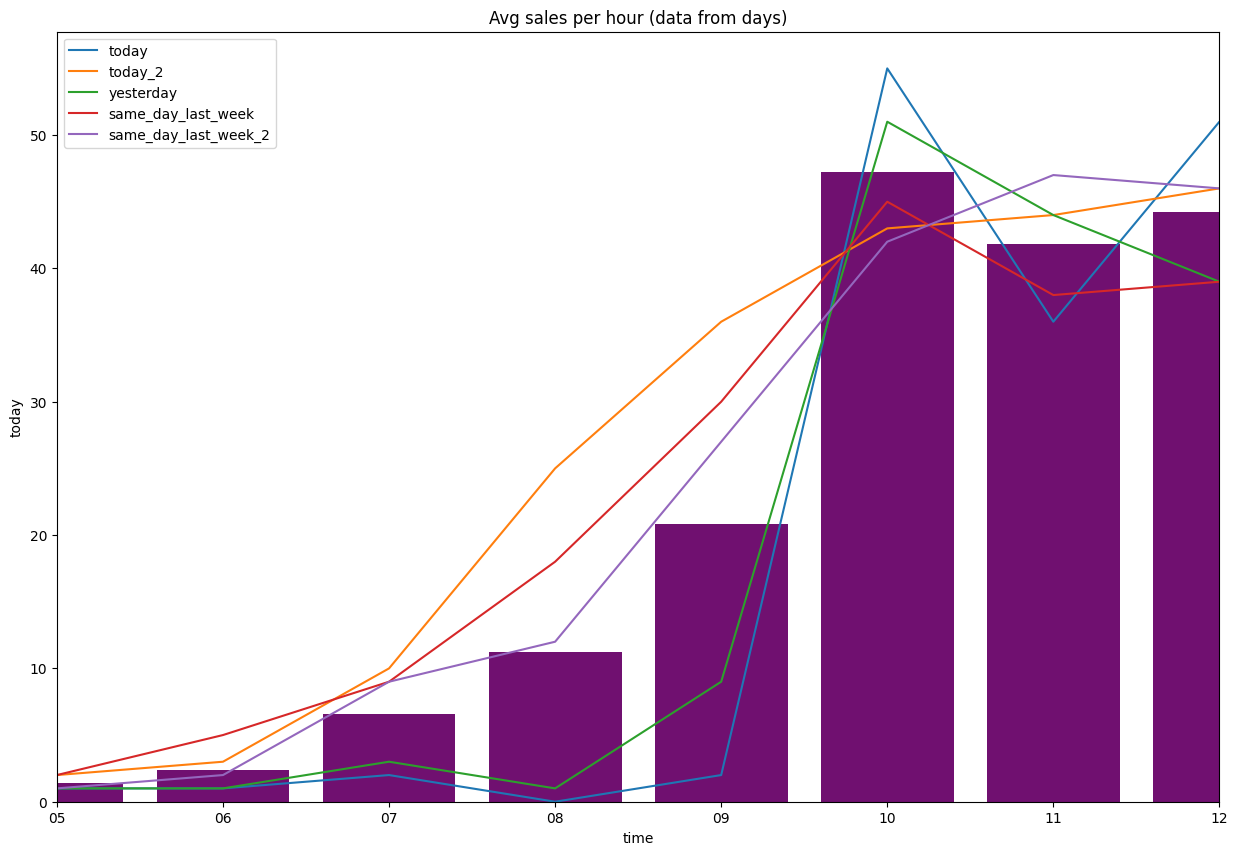

In [18]:
plt.figure(figsize=(15,10))
sns.lineplot(lines, x='time', y='today', label='today')
sns.lineplot(lines, x='time', y='today_2', label='today_2')
sns.lineplot(lines, x='time', y='yesterday', label='yesterday')
sns.lineplot(lines, x='time', y='same_day_last_week', label='same_day_last_week')
sns.lineplot(lines, x='time', y='same_day_last_week_2', label='same_day_last_week_2')
ax = sns.barplot(lines, x='time', y='avg_hour', color='purple')

ax.set_xlim(5,12)
plt.title('Avg sales per hour (data from days)')
plt.legend(loc="upper left")

From 7am to 10am we have a smaller number of sales and a sudden spike in *today* and *yesterday*. Although it looks anomalous, we cannot declare it an anomaly with 100% certainty. This can easily be just a normal variance in the whole, or it could have an easy explanation from an unseen underlying variable, such as:

- Holidays: people wake up later on holidays and weekends. We have data that contradicts this as a weekend (*same_day_last_week*), but it could be that this time around we have a holiday, which explains a peak later on in the day.
- Sale: There could have been a sale announced on this website, and it could be starting at 10 am, so most people were waiting on the sale to start buying, thus the spike in sales surpasses every other day
- A bad week: Sometimes larger things are at play in society, and this could just be one of those bad weeks in sales. People in the business would know, it just happens sometimes.

To further show how this could be just a normal variance of the data, here are the percentage changes from 5am to 12pm.

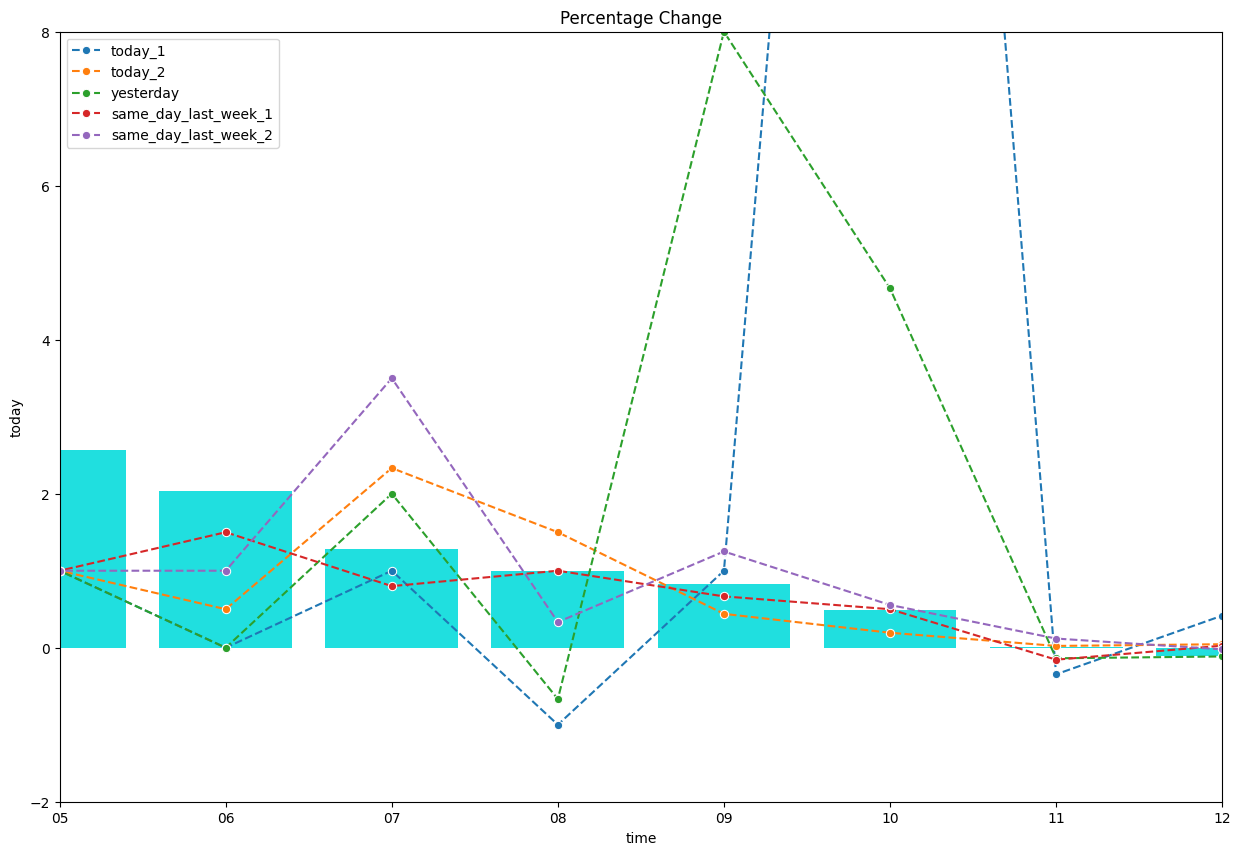

In [19]:


plt.figure(figsize=(15,10))
sns.lineplot(pct_change_analysis, x='time', y='today', label='today_1', marker='o',linestyle="dashed")
sns.lineplot(pct_change_analysis, x='time', y='today_2', label='today_2', marker='o',linestyle="dashed")
sns.lineplot(pct_change_analysis, x='time', y='yesterday', label='yesterday', marker='o',linestyle="dashed")
sns.lineplot(pct_change_analysis, x='time', y='same_day_last_week', label='same_day_last_week_1', marker='o',linestyle="dashed")
sns.lineplot(pct_change_analysis, x='time', y='same_day_last_week_2', label='same_day_last_week_2', marker='o',linestyle="dashed")

ax = sns.barplot(pct_change_analysis, x='time', y='avg_last_month', color='cyan')
ax.set_ylim(-2, 8)
ax.set_xlim(5,12)
plt.title('Percentage Change')
plt.legend(loc="upper left")

As we can see, even with the numbers being few, *today_1* and *yesterday* follow all the trends clearly and correctly, even within the big spikes and percentage changes. If anything, *same_day_last_week* seems to not follow the same trend as the other days, growing in sales in hours other days fell shorter in sales, and falling short when other days grew.

Of course the spikes are notable, but looking back at the pure numbers, with the percentages in mind:

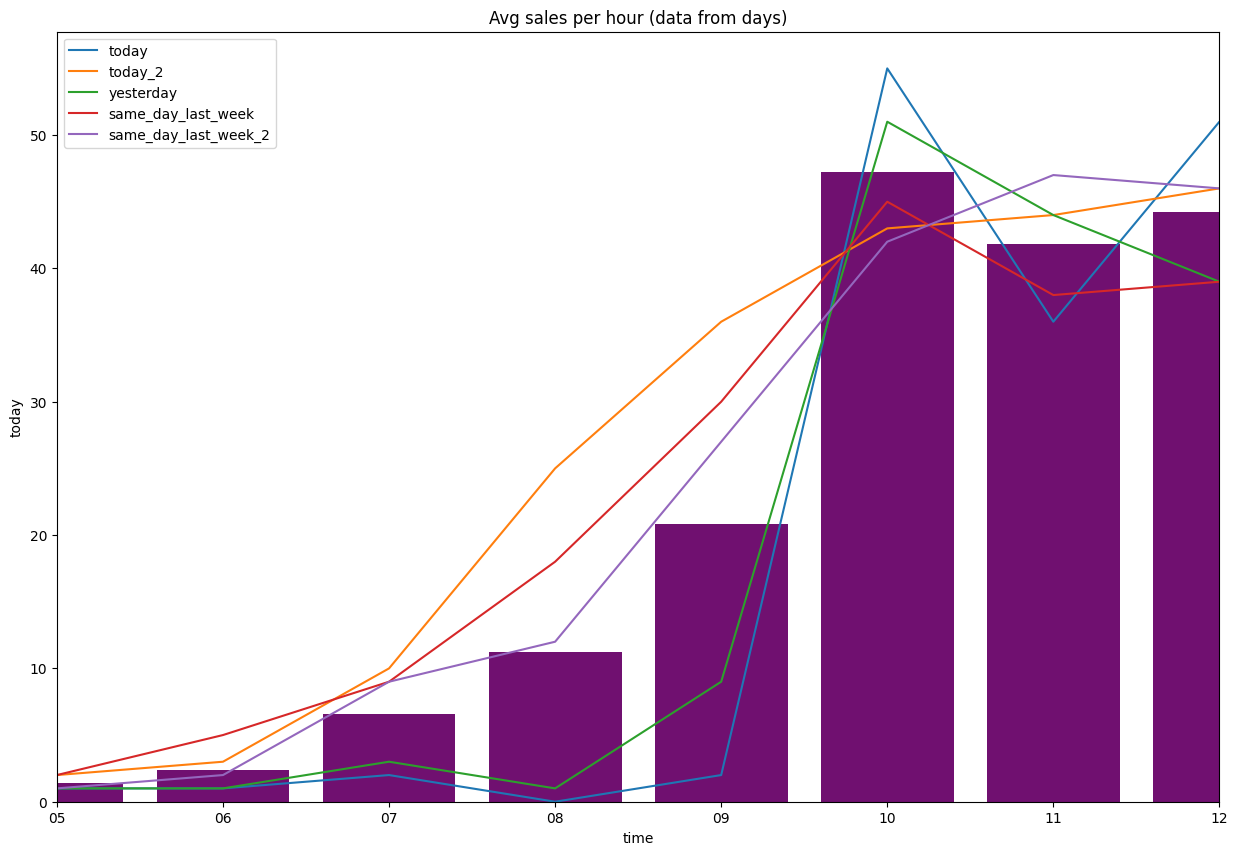

In [20]:
plt.figure(figsize=(15,10))
sns.lineplot(lines, x='time', y='today', label='today')
sns.lineplot(lines, x='time', y='today_2', label='today_2')
sns.lineplot(lines, x='time', y='yesterday', label='yesterday')
sns.lineplot(lines, x='time', y='same_day_last_week', label='same_day_last_week')
sns.lineplot(lines, x='time', y='same_day_last_week_2', label='same_day_last_week_2')
ax = sns.barplot(lines, x='time', y='avg_hour', color='purple')

ax.set_xlim(5,12)
plt.title('Avg sales per hour (data from days)')
plt.legend(loc="upper left")

All the numbers are within the trend. 

Ultimately this could be a anomaly, or it could not be. We can only be sure with further investigation within the whole data and it's context.

## Conclusion

We found that, in the *checkout_2* file, from hours 14 to 17 on the current day, there was most probably an anomaly. Indications of an anomaly are: 
- A clear and defined trend of sales in certain hours, in which the anomaly doesn't follow
- Big difference in numbers between anomalous data and other data from different days
- Lack of correlation, when other days on sales and other variables are highly correlated (reinforces arguments 1 and 2)

### Notes:

- It was also found that *yesterday_2* and *today_1* are exactly the same (see plotly graph). Which indicates that checkout_2 is from a day after checkout_1.
- Another somewhat anomalous behavior in the data is from *yesterday_2*, where from hours 9 to 10 sales went from 2 to 55, an increase of 2600%. Similar behavior was found in *yesterday_1* with 1000% increase. But as said before, this can be explained by other things, and we can't ultimately decrete it as an anomaly. We would need more context and data.
- **AI and any machine learning models were discarded from start because data was too small**, focusing on using any model would only distract and confuse the analysis.
- With more data, a model to predict sales for each hour seems very possible